<a href="https://colab.research.google.com/github/aysutnyva/Machine_Learning/blob/main/moscow_housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!kaggle datasets download egorkainov/moscow-housing-price-dataset

Dataset URL: https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset
License(s): MIT
  0% 0.00/343k [00:00<?, ?B/s]
100% 343k/343k [00:00<00:00, 113MB/s]


In [ ]:
!unzip /content/moscow-housing-price-dataset.zip

Archive:  /content/moscow-housing-price-dataset.zip
  inflating: data.csv                


In [ ]:
mhp = pd.read_csv("/content/moscow-housing-price-dataset.zip")
mhp

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [ ]:
mhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
mhp.shape

(22676, 12)

In [ ]:
mhp.isna().sum()

,0
Price,0
Apartment type,0
Metro station,0
Minutes to metro,0
Region,0
Number of rooms,0
Area,0
Living area,0
Kitchen area,0
Floor,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder2 = LabelEncoder()
mhp["Apartment type"] = encoder2.fit_transform(mhp["Apartment type"])
mhp["Metro station"] = encoder2.fit_transform(mhp["Metro station"])
mhp["Region"] = encoder2.fit_transform(mhp["Region"])
mhp["Renovation"] = encoder2.fit_transform(mhp["Renovation"])


In [ ]:
X = mhp.drop('Price', axis=1)
y = mhp['Price'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_test = rfr.predict(X_test)
y_pred_test

array([4.52506873e+06, 1.19707131e+07, 1.09561449e+07, ...,
       1.31908631e+08, 1.05244584e+07, 5.70898096e+06])

In [ ]:
y_pred_train = rfr.predict(X_train)
y_pred_train

array([1.68363911e+07, 1.90496847e+07, 8.18466800e+06, ...,
       1.34179319e+07, 1.03280044e+08, 1.14411627e+07])

In [ ]:
len(X_train), len(X_test)

(18140, 4536)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18140, 11), (4536, 11), (18140,), (4536,))

In [ ]:
rfr.score(X_train, y_train)

0.9721766759569769

In [ ]:
rfr.score(X_test, y_test)

0.8094556551688865

In [ ]:
preds1 = pd.DataFrame(rfr.predict(X_test))
preds1

,0
0,4.525069e+06
1,1.197071e+07
2,1.095614e+07
3,1.184433e+07
4,2.006888e+07
...,...
4531,3.769524e+07
4532,6.728819e+06
4533,1.319086e+08
4534,1.052446e+07


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("RMSE:", mean_squared_error(y_test, y_pred_test))
print("R² Score:", r2_score(y_test, y_pred_test))

Linear Regression Results:
MAE: 9358748.832220461
RMSE: 1262660691887934.2
R² Score: 0.8094556551688865


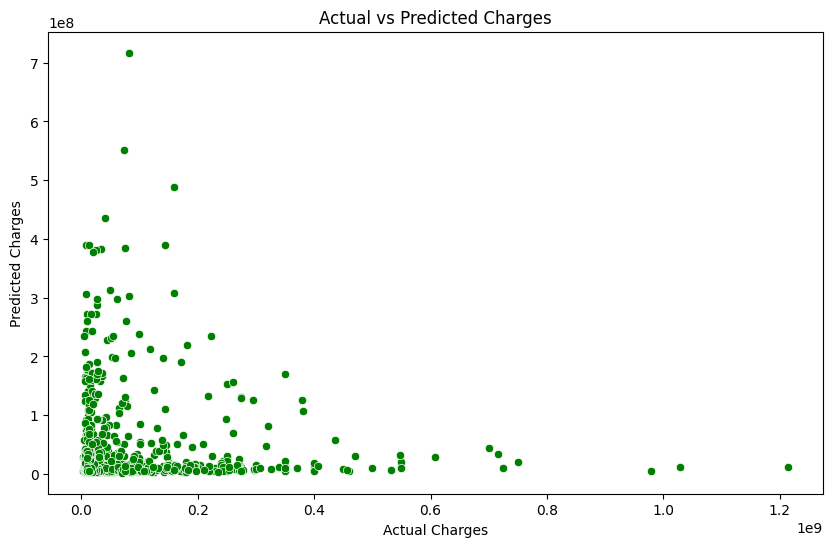

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

predicted_df = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': preds1[0]})

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_df['Actual Charges'], y=predicted_df['Predicted Charges'], c = 'green')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()